In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/509 assessment 2/Q3/D2.csv')

In [ ]:
data.drop('immigrant', axis=1, inplace=True)
data.drop('race', axis=1, inplace=True)
data.drop('insurance', axis=1, inplace=True)

In [ ]:
data['gender'] = data['gender'].replace('other', 'male')

In [4]:
my_data = data[['age', 'height', 'weight', 'alcohol', 'contacts_count', 'house_count', 'worried', 'covid19_positive']].copy()

In [5]:
my_data = my_data[
    (my_data['covid19_positive']== 1)
]

In [7]:
my_data = my_data[['age', 'height', 'weight', 'alcohol', 'contacts_count', 'house_count', 'worried']] #droping covid19

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # convert df to matrix
# X = my_data.to_numpy()
# # scaling
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [8]:
from sklearn.preprocessing import StandardScaler
# mapping

age_map = {'30_40': 1, '70_80': 2, '50_60': 3, '20_30': 4, '60_70': 5, '40_50': 6, '80_90': 7, '90_100': 8, '10_20': 9, '0_10': 10, '100_110': 11}
my_data['age'] = my_data['age'].map(age_map)

# convert df to matrix
X = my_data.to_numpy()
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
pip install KModes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [13]:
  model = KPrototypes(n_clusters=5, random_state=42)
  model.fit_predict(X, categorical=[1])

array([0, 0, 0, ..., 0, 2, 2], dtype=uint16)

In [14]:
X_num = [[row[1], row[2], row[3], row[4], row[5], row[6]] for row in X] # Variables of X with numeric datatype
X_cat = [[row[0]] for row in X] # variables of X with categorical datatyp

In [15]:
model

KPrototypes(gamma=0.5, n_clusters=5, random_state=42)

In [16]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
print("Silscore for numeric variables: " + str(silScoreNums))
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
print("Silscore for categorical variables: " + str(silScoreCats))

# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=7: " + str(silScore))

Silscore for numeric variables: 0.21020387529189094
Silscore for categorical variables: -0.048814614919597696
The avg silhouette score for k=7: 0.08069463018614662


In [17]:
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=5: " + str(silScore))

The avg Silhouette score for k=7: 0.08069463018614662


Cluster membership
0    1097
2     502
1     462
3     267
4     214
Name: Cluster_ID, dtype: int64


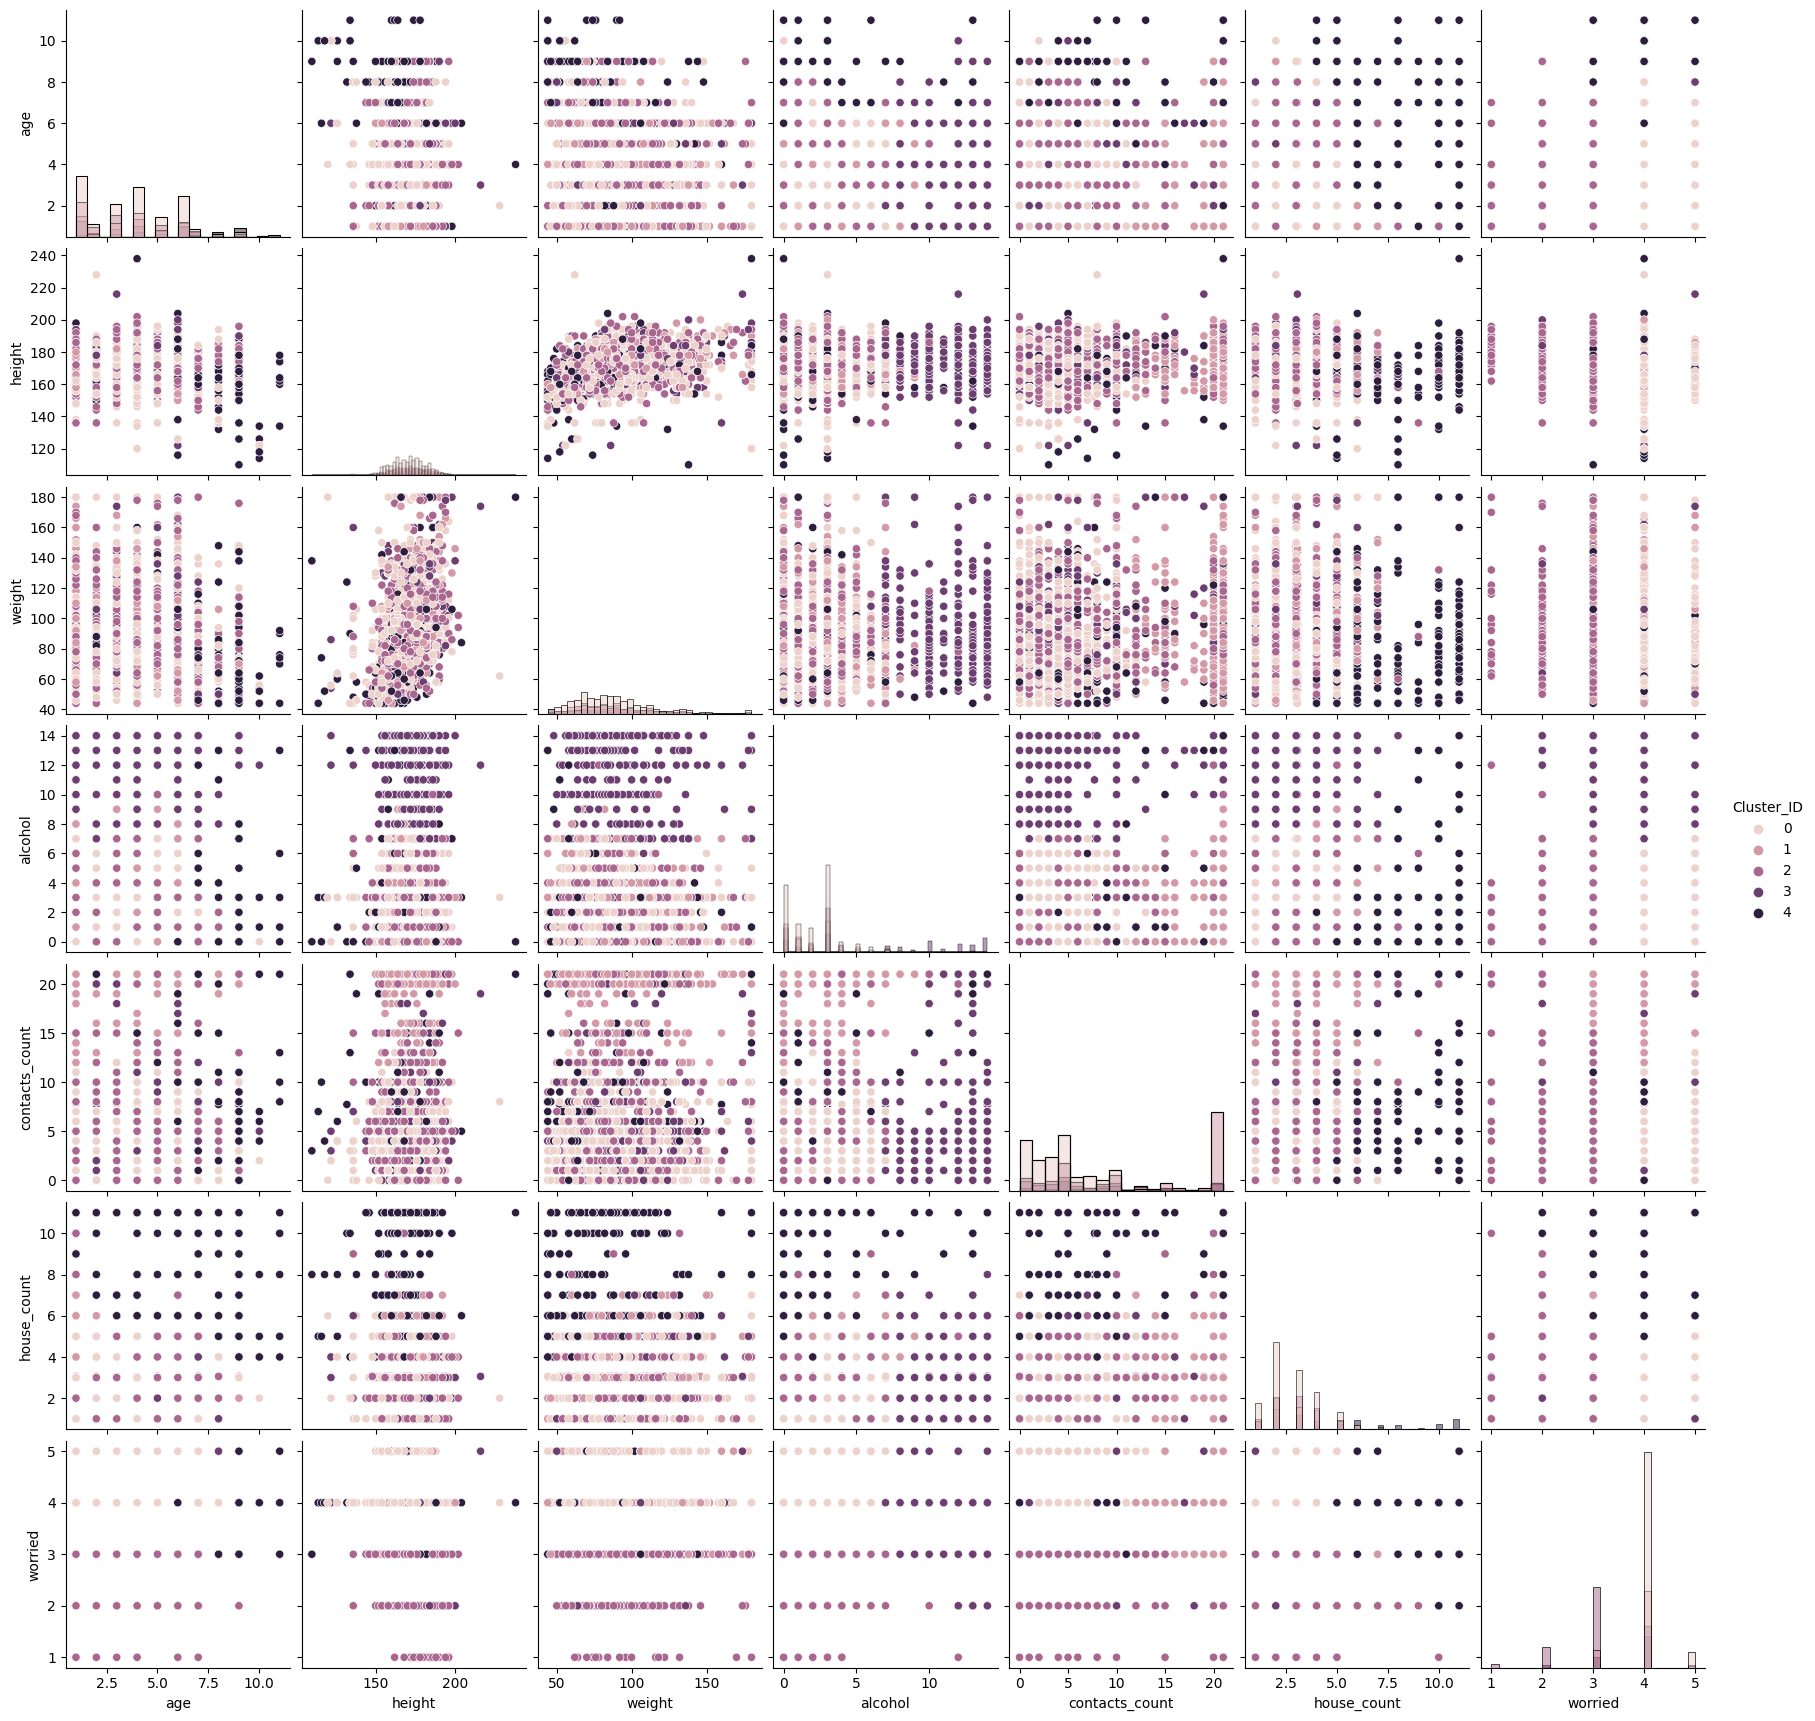

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

y=model.fit_predict(X, categorical=[1]) 
my_data['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(my_data['Cluster_ID'].value_counts())
# pairplot the cluster distribution.
cluster_g = sns.pairplot(my_data, hue='Cluster_ID',diag_kind='hist')
plt.show()